# Data Analysis and Mining 2018/2019

## Project 1 - Fuzzy Clustering with Anomalous Patterns
<a id='index'></a>

### Index


> - [a)](#a) Applying Fuzzy C-Means to our dataset for different values of the parameter c = c_min, ..., c_max and plot the Fuzzy Partition Coefficient versus c
- [b)](#b) Implementing the Anomalous Pattern (AP) clustering algorithm and testing with the benchmark Iris data set
- [c)](#c) Taking the Anomalous Clustering as the initialization algorithm to the Fuzzy C-Means and applying to our data set
- [d)](#d) Discussing the results obtained by the Anomalous Patterns FCM on our data case
- [e)](#e) Applying two validation indices, the Adjust Rand Index (ARI) and Xie-Beni, to access the quality of the Fuzzy C-Partitions obtained. Comparing the results with the ones from Anomalous Patterns FCM
- [f)](#f) Making an interpretation of the found clusters by the AnomalousPatterns_FCM for our data

### Setup
We will make use of the following Python libraries:

In [56]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

#from sklearn import datasets
import skfuzzy as fuzz

from sklearn.metrics import adjusted_rand_score
from scipy.spatial.distance import cdist

from anomalous_cluster import anomalous, post_process_ANCL

### Dataset Metadata

The dataset consists of several medical predictor variables and one target variable, Outcome. The predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

0. Pregnancies - Number of times pregnant
1. Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
2. Blood Pressure - Diastolic blood pressure ($mm Hg$)
3. Skin Thickness - Triceps skin fold thickness ($mm$)
4. Insulin - 2-Hour serum insulin ($mu U/ml$)
5. BMI - Body mass index ($Kg/m^2$)
6. Diabetes Pedigree Function - Diabetes pedigree function
7. Age - Age (years)
8. Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

### Load dataset

[Text(0, 0.5, 'BMI'), Text(0.5, 0, 'Skin Thickness')]

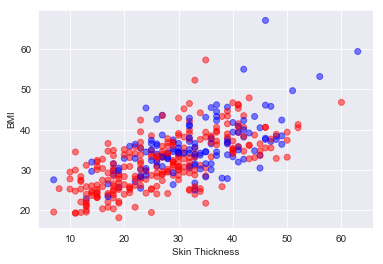

In [57]:
data = np.loadtxt('diabetes.csv',delimiter=',',skiprows=1)

# Removing patients with missing data
data = data[(data[:,1]!=0)
    & (data[:,2] !=0)
    & (data[:,3] !=0)
    & (data[:,4] !=0)
    & (data[:,5] !=0)]

xpts,ypts,labels = data[:,3],data[:,5], data[:,-1]

colors = ['b', 'orange', 'g', 'r', 'violet', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen', 'peachpuff', 'lime', 'lightsalmon']

colors_palette = {0: "r", 1: "b"}
label_colors = [colors_palette[c] for c in labels]

# For visualization purposes we'll only use 2 features
data = np.column_stack((data[:,3],data[:,5]))

ax = sns.regplot(x=xpts, y=ypts, fit_reg=False, scatter_kws={'alpha':0.5,'color':label_colors})
ax.set(xlabel='Skin Thickness', 
       ylabel='BMI')

<a id='a'></a>

## Applying Fuzzy C-Means to our dataset for different values of the parameter c = c_min, ..., c_max and plotting the Fuzzy Partition Coefficient versus c

The Fuzzy Partition Coefficient is defined by:<br>
$$F_c(Ṵ)=\frac{tr(Ṵ*Ṵ^T)}{n}$$<br>
Where Ṵ is the fuzzy partition matrix being segregated into c classes (partitions) and n is the number of data sets.

<Figure size 1440x720 with 0 Axes>

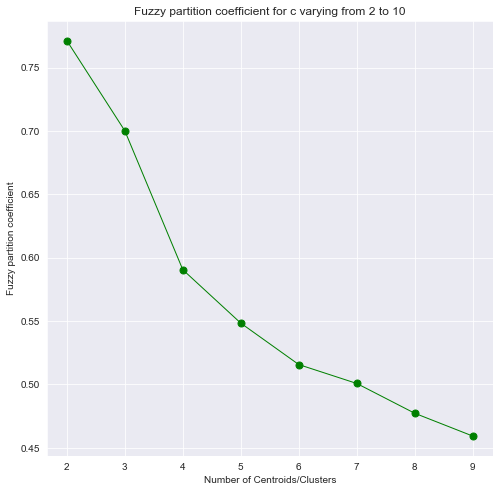

In [58]:
c_min = 2
c_max = 10
FPCs = []
#print(data.shape)

for ncenters in range(c_min,c_max):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, ncenters, 2, error=0.001, maxiter=100, init=None)
    if ncenters == 3:
        # u (c x n)
        plt.figure(figsize=(20,10))
        cluster_membership = np.argmax(u, axis=0)
    FPCs.append(fpc)

plt.figure(figsize=(8,8))
plt.title('Fuzzy partition coefficient for c varying from {0} to {1}'.format(c_min,c_max))
plt.xlabel('Number of Centroids/Clusters')
plt.ylabel('Fuzzy partition coefficient')
plt.plot(range(c_min,c_max),FPCs,'go-',linewidth=1,markersize=7)
plt.savefig('Images/FPC vs c.png',dpi=300)

The best number of clusters seems to be 2. This makes sense because as seen above our data scatter plot only has 1 one globular shape and Fuzzy C-Means is biased towards globular clusters meaning that any number of clusters above 1 will only deteriorate the quality of the clusters.

<a id='b'></a>

## Implementing the Anomalous Pattern (AP) clustering algorithm and testing with the benchmark Iris data set

In [59]:
# Benchmark Iris set
iris_data = np.loadtxt('iris.dat')

# Grand mean
me = [feature.mean() for feature in iris_data.T]

# Range standardization
rang = [max(feature)-min(feature) for feature in iris_data.T]

# Z-Score standardization
rang = [np.std(feature) for feature in iris_data.T]

# no standardize
rang = [1 for feature in iris_data.T]

# Standardised data scatter
dd = sum(sum((iris_data-me)**2))

result = anomalous(iris_data,me,rang,dd)

n_clust = 0
for cluster in result:
    n_clust+=1
    print('Cluster number:',n_clust)
    print('\nCluster cardinality:',len(cluster[0]))
    print('\nList of indices in the anomalous cluster:\n',cluster[0])
    print('\nStandardised centroid:\t',cluster[1])
    print('\nProportion of the data scatter:\t{0}%'.format(round(cluster[2],2)))
    print('\n==========================================================================\n')

Cluster number: 1

Cluster cardinality: 60

List of indices in the anomalous cluster:
 [ 55  56  62  67  69  77  79  81  82  87  93 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 139 140 141 142 143
 144 145 146 147 148 149]

Standardised centroid:	 [ 0.76       -0.07733333  1.67366667  0.74066667]

Proportion of the data scatter:	34.64%


Cluster number: 2

Cluster cardinality: 50

List of indices in the anomalous cluster:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

Standardised centroid:	 [-0.83733333  0.37066667 -2.296      -0.95333333]

Proportion of the data scatter:	51.51%


Cluster number: 3

Cluster cardinality: 31

List of indices in the anomalous cluster:
 [ 51  52  53  57  58  59  60  61  63  65  68  70  71  72  73  74  75  76
  78  80  83  84  85  88  89  90 

### Data pre-process before applying the AP Algorithm

In [60]:
me = [feature.mean() for feature in data.T]

# Range standardization
rang = [max(feature)-min(feature) for feature in data.T]

# Z-Score standardization
rang = [np.std(feature) for feature in data.T]

# no standardization
rang = [1 for feature in data.T]

# Standardised data scatter
dd = sum(sum((data-me)**2))

result = anomalous(data,me,rang,dd)

result = post_process_ANCL(result,threshold=20)

init = np.zeros((len(result),len(data)))

<a id='c'></a>

##  Taking the Anomalous Clustering as the initialization algorithm to the Fuzzy C-Means and applying to our data set

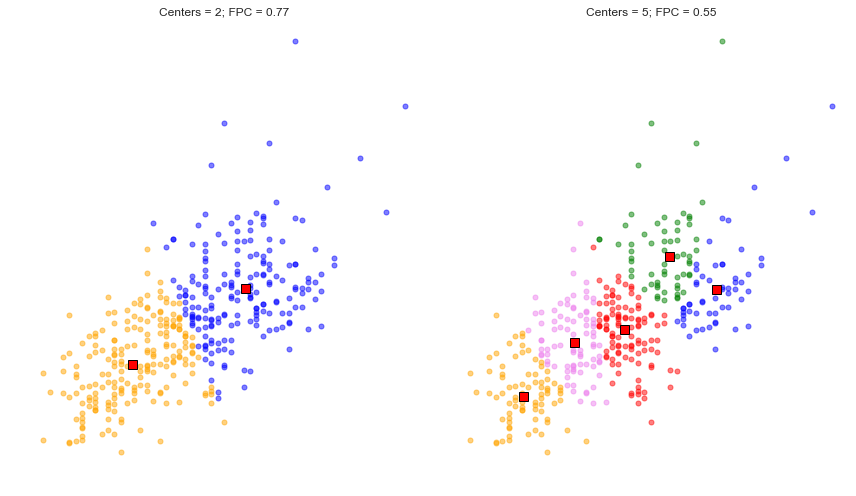

In [61]:
# Create initial guess at fuzzy c-partitioned matrix based on the Anomalous Clusters obtained
for c in range(len(result)):
    for point in result[c][0]:
        init[c,point] = .99
        
# Set up the loop and plot
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
alldata = data.T

ncenters = 2
cntr_FCM, u_FCM, _, _, _, _, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

# Plot assigned clusters, for each data point in training set
cluster_membership_FCM = np.argmax(u_FCM, axis=0)
for j in range(ncenters):
    axes[0].plot(xpts[cluster_membership_FCM == j], ypts[cluster_membership_FCM == j], '.',
                 color=colors[j], markersize=10, alpha=0.5)

# Mark the center of each fuzzy cluster
for pt in cntr_FCM:
    axes[0].plot(pt[0], pt[1], 'rs', markersize=9, markeredgecolor='k')

axes[0].set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
axes[0].axis('off')

ncenters = len(result)
cntr_AP_FCM, u_AP_FCM, _, _, _, _, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=init)

# Plot assigned clusters, for each data point in training set
cluster_membership_AP_FCM = np.argmax(u_AP_FCM, axis=0)
for j in range(ncenters):
    axes[1].plot(xpts[cluster_membership_AP_FCM == j], ypts[cluster_membership_AP_FCM == j], '.',
                 color=colors[j], markersize=10, alpha=0.5)
    
plt.title('Centers = {0}'.format(ncenters))
plt.axis('off')    
    

    
# Mark the center of each fuzzy cluster
for pt in cntr_AP_FCM:
    axes[1].plot(pt[0], pt[1], 'rs', markersize=9, markeredgecolor='k')

axes[1].set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
axes[1].axis('off')

fig.tight_layout()
fig.savefig('Images/FCM Cluster vs AP-FCM Cluster',dpi=300)

<a id='d'></a>

## Discussing the results obtained by the Anomalous Patterns FCM on our data case 

The initial prototypes are far away from the reference point with some being closer to it as expected with the evolution of the algorithm. There are quite a few near the center given the natural shape of our data because as we can see above most of the points are all concentrated in one particular area without many groups of points presenting an anomalous behaviour and being far from the grand mean. The number of clusters was chosen based on a threshold applied to a cluster's cardinality, in this case we decided that every cluster must have at least cardinality $N_k > 20$.

<a id='e'></a>

## Applying two validation indices, the Adjust Rand Index (ARI) and Xie-Beni, to access the quality of the Fuzzy C-Partitions obtained. Comparing the results with the ones from Anomalous Patterns FCM

In [62]:
def xie_beni_score(x, u, v):
    """
    x = data set
    u - fuzzy matrix
    v - cluster centers
    """
    n = x.shape[0]
    c = v.shape[0]

    um = u**2
    
    d2 = cdist(x, v)**2
    v2 = cdist(v, v)**2
    
    v2[v2 == 0.0] = np.inf

    return np.sum(um.T*d2)/(n*np.min(v2))

ari_score_FCM = adjusted_rand_score(labels, cluster_membership_FCM)
print('Fuzzy C-Means Adjusted Rand Index score:',round(ari_score_FCM,4))

xb_score_FCM = xie_beni_score(data, u_FCM, cntr_FCM)
print('Fuzzy C-Means Xie-Beni score:',round(xb_score_FCM,4))

ari_score_AP_FCM = adjusted_rand_score(labels, cluster_membership_AP_FCM)
print('Anomalous Pattern Fuzzy C-Means Adjusted Rand Index score:',round(ari_score_AP_FCM,4))

xb_score_AP_FCM = xie_beni_score(data, u_AP_FCM, cntr_AP_FCM)
print('Anomalous Pattern Fuzzy C-Means Xie-Beni score:',round(xb_score_AP_FCM,4))

Fuzzy C-Means Adjusted Rand Index score: 0.0736
Fuzzy C-Means Xie-Beni score: 0.1377
Anomalous Pattern Fuzzy C-Means Adjusted Rand Index score: 0.022
Anomalous Pattern Fuzzy C-Means Xie-Beni score: 0.2566


<a id='f'></a>

## Making an interpretation of the found clusters by the AnomalousPatterns_FCM for our data

As discussed above the natural shape of our data doesn't present anomalous patterns, having most of the points all concentrated in one particular area near the grand mean. So its expected that the AP-FCM algorithm will have a similar result to the original FCM because there's no benefit to looking for Anomalous Patterns in a dataset where there are none present.